## Hamilton Depression Scale

In [1]:
#This is a 17-item self-report scale; each item is an integer from 0-4 (some items only allow for a max of 2)
#Of all of the available datasets, I think this makes the most sense to start with.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
%matplotlib inline

In [3]:
hrsd01_filename = 'Data/hrsd01.txt'

In [4]:
hrsd01 = pd.read_table(hrsd01_filename)

/Users/bing/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0,1,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Basic visualization stuff

In [5]:
hrsd01.head(3)

,collection_id,dataset_id,subjectkey,src_subject_id,interview_date,interview_age,gender,crcid,date,update,lang_visit,hsoin,hmnin,hemin,hmdsd,hpanx,hinsg,happt,hwl,hsanx,hhypc,hvwsf,hsuic,hintr,hengy,hslow,hagit,hsex,hdtot_r,days_baseline,level,month,time_point,hrsd_total,hamd_02,hamd_04,hamd_05,hamd_09,hamd_10,hamd_11,hamd_12,hamd_13,hamd_15,hamd_16,hamd_17,hamd_18,hamd_19,hamd_22,hamd_25,hamd_31,hamd_32,hamd_33,hamd_34,hamd_35,hamd_36,hamd_score_24,subject_description,site,session_id,visit,version_form,completed,study,week,hypersom_1,hyplen,ca220,diurvar,diurtm,phase,vis_type,hwl_hx,hwl_wk,date_updated,neurotmh,neurotmm,study_id,mildtime,sevtime,saps_ad10,ksd1dur,visnum,hamsc21,hamsc28,ham18a,ham18b,me2,hsleep,hnap,hpre,hmre,collection_title
0,collection_id,dataset_id,The NDAR Global Unique Identifier (GUID) for r...,Subject ID how it's defined in lab/project,Date on which the interview/genetic test/sampl...,Age in months at the time of the interview/tes...,Sex of the subject,CRC ID/ROA ID,Open Label Baseline date,Updated form,Language during visit,HRS Initial insomnia,HRS Middle insomnia,HRS Late insomnia,HRS Depressed mood,HRS Psychic anxiety,HRS Loss of insight,HRS Appetite,HRS Weight loss,HRS Somatic anxiety,HRS Hypochondriasis,HRS Guilt feelings and delusions,HRS Suicide,HRS Work and interests,HRS Somatic energy,HRS Retardation. Psychomotor (Slowness of thou...,HRS Agitation,HRS Libido,HRS total score (recorded),Days since baseline,Treatment level,Month in Follow-Up,Assessment time point,HRS total score,Hopelessness,Helplessness,Social withdrawal,Hypersomnia,Somatic symptoms gastrointestinal,Appetite increase,Increased eating,Carbohydrate craving,14b Loss of weight rated by ward staff,15a Weight Gain,15b Gain of weight rated by ward staff,Somatic symptoms general,Fatiguability,Worthlessness,Concentration,29A. (H18) Diurnal Variation,"29B. When present, mark the severity of the va...",Depersonalization/derealization,Paranoid symptoms,Obsessive and compulsive symptoms,HAMD Total 17 Item Score,HAMD Total 24 Item Score,Subject related information (e.g the affection...,Site,session ID/screening ID,Visit name,Form used,Checks if form is completed,Study,Week in level/study,"Hypersomnia: During the past week, have you be...",Sleep length used to measure Hypersomnia,Current condition - Other depressive symptoms:...,Diurnal variation: mood/energy,Diurnal variation mood/energy: time period,Phase,Visit type,HRS Weight loss by history,HRS Weight loss by week,Date record updated,Time Hours,Time Minutes,Study ID number,Diurnal variation: mild variation time,Diurnal variation: severe variation time,Rater number,Duration of Depressed Mood (weeks),Numeric Visit Number,Score 21 items,score 28 items,Diurnal Variation Severity AM,Diurnal Variation Severity PM,Status,Oversleeping,Napping,Psychic Retardation (Slowness of speech and th...,Motoric Retardation (Slowness in movement and ...,collection_title
1,2148,9226,NDAR_INVFC322YBJ,3,NaN,235,M,58,NaN,0,NaN,0,0,1,3,2,0,1,1,1,0,0,1,3,1,1,1,0,16,0,Enrollment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sequenced Treatment Alternatives to Relieve De...
2,2148,9226,NDAR_INVTR343PXA,6,NaN,509,M,99,NaN,0,0,2,0,2,3,3,0,1,0,2,1,2,0,1,0,2,1,0,20,0,Enrollment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sequenced Treatment Alternatives to Relieve De...


In [6]:
hrsd01.tail(3)

,collection_id,dataset_id,subjectkey,src_subject_id,interview_date,interview_age,gender,crcid,date,update,lang_visit,hsoin,hmnin,hemin,hmdsd,hpanx,hinsg,happt,hwl,hsanx,hhypc,hvwsf,hsuic,hintr,hengy,hslow,hagit,hsex,hdtot_r,days_baseline,level,month,time_point,hrsd_total,hamd_02,hamd_04,hamd_05,hamd_09,hamd_10,hamd_11,hamd_12,hamd_13,hamd_15,hamd_16,hamd_17,hamd_18,hamd_19,hamd_22,hamd_25,hamd_31,hamd_32,hamd_33,hamd_34,hamd_35,hamd_36,hamd_score_24,subject_description,site,session_id,visit,version_form,completed,study,week,hypersom_1,hyplen,ca220,diurvar,diurtm,phase,vis_type,hwl_hx,hwl_wk,date_updated,neurotmh,neurotmm,study_id,mildtime,sevtime,saps_ad10,ksd1dur,visnum,hamsc21,hamsc28,ham18a,ham18b,me2,hsleep,hnap,hpre,hmre,collection_title
21045,2148,9226,NDAR_INVYJ754JX7,3578,NaN,524,M,NaN,NaN,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,2,NaN,211,Level 4,-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sequenced Treatment Alternatives to Relieve De...
21046,2148,9226,NDAR_INVDX813HWJ,3933,NaN,474,M,NaN,NaN,0,0,0,0,0,1,2,0,0,0,3,1,1,1,3,1,1,1,2,NaN,345,Level 4,-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sequenced Treatment Alternatives to Relieve De...
21047,2148,9226,NDAR_INVFY573ZJG,4160,NaN,658,M,NaN,NaN,1,0,2,2,2,3,3,0,1,1,4,3,2,0,2,1,1,1,2,NaN,287,Level 4,-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sequenced Treatment Alternatives to Relieve De...


In [7]:
hrsd01.ndim

2

In [8]:
hrsd01.shape

(21048, 92)

In [9]:
hrsd01.size

1936416

## Making a workable matrix

In [10]:
hrsd02 = pd.read_table(hrsd01_filename, skiprows=[1])
#skipping the first row so that I don't get that concatination error

/Users/bing/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
hrsd02.head(3)

,collection_id,dataset_id,subjectkey,src_subject_id,interview_date,interview_age,gender,crcid,date,update,lang_visit,hsoin,hmnin,hemin,hmdsd,hpanx,hinsg,happt,hwl,hsanx,hhypc,hvwsf,hsuic,hintr,hengy,hslow,hagit,hsex,hdtot_r,days_baseline,level,month,time_point,hrsd_total,hamd_02,hamd_04,hamd_05,hamd_09,hamd_10,hamd_11,hamd_12,hamd_13,hamd_15,hamd_16,hamd_17,hamd_18,hamd_19,hamd_22,hamd_25,hamd_31,hamd_32,hamd_33,hamd_34,hamd_35,hamd_36,hamd_score_24,subject_description,site,session_id,visit,version_form,completed,study,week,hypersom_1,hyplen,ca220,diurvar,diurtm,phase,vis_type,hwl_hx,hwl_wk,date_updated,neurotmh,neurotmm,study_id,mildtime,sevtime,saps_ad10,ksd1dur,visnum,hamsc21,hamsc28,ham18a,ham18b,me2,hsleep,hnap,hpre,hmre,collection_title
0,2148,9226,NDAR_INVFC322YBJ,3,NaN,235.0,M,58,NaN,0,NaN,0.0,0.0,1.0,3.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,1.0,0.0,16.0,0,Enrollment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sequenced Treatment Alternatives to Relieve De...
1,2148,9226,NDAR_INVTR343PXA,6,NaN,509.0,M,99,NaN,0,0.0,2.0,0.0,2.0,3.0,3.0,0.0,1.0,0.0,2.0,1.0,2.0,0.0,1.0,0.0,2.0,1.0,0.0,20.0,0,Enrollment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sequenced Treatment Alternatives to Relieve De...
2,2148,9226,NDAR_INVZK756CD5,7,NaN,339.0,M,4,NaN,0,NaN,2.0,2.0,2.0,3.0,1.0,0.0,2.0,1.0,2.0,0.0,3.0,0.0,3.0,2.0,2.0,1.0,0.0,26.0,0,Enrollment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sequenced Treatment Alternatives to Relieve De...


In [12]:
hrsd01.columns

Index(['collection_id', 'dataset_id', 'subjectkey', 'src_subject_id',
       'interview_date', 'interview_age', 'gender', 'crcid', 'date', 'update',
       'lang_visit', 'hsoin', 'hmnin', 'hemin', 'hmdsd', 'hpanx', 'hinsg',
       'happt', 'hwl', 'hsanx', 'hhypc', 'hvwsf', 'hsuic', 'hintr', 'hengy',
       'hslow', 'hagit', 'hsex', 'hdtot_r', 'days_baseline', 'level', 'month',
       'time_point', 'hrsd_total', 'hamd_02', 'hamd_04', 'hamd_05', 'hamd_09',
       'hamd_10', 'hamd_11', 'hamd_12', 'hamd_13', 'hamd_15', 'hamd_16',
       'hamd_17', 'hamd_18', 'hamd_19', 'hamd_22', 'hamd_25', 'hamd_31',
       'hamd_32', 'hamd_33', 'hamd_34', 'hamd_35', 'hamd_36', 'hamd_score_24',
       'subject_description', 'site', 'session_id', 'visit', 'version_form',
       'completed', 'study', 'week', 'hypersom_1', 'hyplen', 'ca220',
       'diurvar', 'diurtm', 'phase', 'vis_type', 'hwl_hx', 'hwl_wk',
       'date_updated', 'neurotmh', 'neurotmm', 'study_id', 'mildtime',
       'sevtime', 'saps_ad10'

In [20]:
len(np.unique(hrsd02.src_subject_id))

4041

In [13]:
hrsd02.shape

(21047, 92)

In [43]:
hrsd02.tail(10)

,collection_id,dataset_id,subjectkey,src_subject_id,interview_date,interview_age,gender,crcid,date,update,lang_visit,hsoin,hmnin,hemin,hmdsd,hpanx,hinsg,happt,hwl,hsanx,hhypc,hvwsf,hsuic,hintr,hengy,hslow,hagit,hsex,hdtot_r,days_baseline,level,month,time_point,hrsd_total,hamd_02,hamd_04,hamd_05,hamd_09,hamd_10,hamd_11,hamd_12,hamd_13,hamd_15,hamd_16,hamd_17,hamd_18,hamd_19,hamd_22,hamd_25,hamd_31,hamd_32,hamd_33,hamd_34,hamd_35,hamd_36,hamd_score_24,subject_description,site,session_id,visit,version_form,completed,study,week,hypersom_1,hyplen,ca220,diurvar,diurtm,phase,vis_type,hwl_hx,hwl_wk,date_updated,neurotmh,neurotmm,study_id,mildtime,sevtime,saps_ad10,ksd1dur,visnum,hamsc21,hamsc28,ham18a,ham18b,me2,hsleep,hnap,hpre,hmre,collection_title
21037,2148,9226,NDAR_INVZB422VRZ,1082,NaN,499.0,F,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,398,Level 4,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sequenced Treatment Alternatives to Relieve De...
21038,2148,9226,NDAR_INVJF750WJX,1108,NaN,717.0,F,NaN,NaN,1,0.0,1.0,2.0,0.0,0.0,1.0,0.0,2.0,2.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,NaN,253,Level 4,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sequenced Treatment Alternatives to Relieve De...
21039,2148,9226,NDAR_INVNP251JW0,2182,NaN,389.0,F,NaN,NaN,0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,226,Level 4,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sequenced Treatment Alternatives to Relieve De...
21040,2148,9226,NDAR_INVAP875AKM,2518,NaN,691.0,M,NaN,NaN,0,0.0,2.0,2.0,NaN,3.0,3.0,0.0,0.0,0.0,3.0,1.0,3.0,2.0,3.0,1.0,0.0,2.0,0.0,NaN,350,Level 4,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sequenced Treatment Alternatives to Relieve De...
21041,2148,9226,NDAR_INVTC268KNF,3141,NaN,627.0,M,NaN,NaN,1,0.0,2.0,0.0,2.0,3.0,3.0,0.0,1.0,1.0,1.0,1.0,3.0,0.0,2.0,0.0,1.0,0.0,2.0,NaN,196,Level 4,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sequenced Treatment Alternatives to Relieve De...
21042,2148,9226,NDAR_INVAW738TWZ,3223,NaN,477.0,M,NaN,NaN,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,NaN,371,Level 4,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sequenced Treatment Alternatives to Relieve De...
21043,2148,9226,NDAR_INVTX285ED2,3409,NaN,366.0,F,NaN,NaN,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,200,Level 4,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sequenced Treatment Alternatives to Relieve De...
21044,2148,9226,NDAR_INVYJ754JX7,3578,NaN,524.0,M,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,NaN,211,Level 4,-2.0,NaN,NaN,NaN,NaN,NaN,N

In [36]:
hrsd_dropped = hrsd02.dropna()
hrsd_dropped.head(3)

,collection_id,dataset_id,subjectkey,src_subject_id,interview_date,interview_age,gender,crcid,date,update,lang_visit,hsoin,hmnin,hemin,hmdsd,hpanx,hinsg,happt,hwl,hsanx,hhypc,hvwsf,hsuic,hintr,hengy,hslow,hagit,hsex,hdtot_r,days_baseline,level,month,time_point,hrsd_total,hamd_02,hamd_04,hamd_05,hamd_09,hamd_10,hamd_11,hamd_12,hamd_13,hamd_15,hamd_16,hamd_17,hamd_18,hamd_19,hamd_22,hamd_25,hamd_31,hamd_32,hamd_33,hamd_34,hamd_35,hamd_36,hamd_score_24,subject_description,site,session_id,visit,version_form,completed,study,week,hypersom_1,hyplen,ca220,diurvar,diurtm,phase,vis_type,hwl_hx,hwl_wk,date_updated,neurotmh,neurotmm,study_id,mildtime,sevtime,saps_ad10,ksd1dur,visnum,hamsc21,hamsc28,ham18a,ham18b,me2,hsleep,hnap,hpre,hmre,collection_title


In [26]:
hrsd02.interview_age[hrsd02.src_subject_id == 17]

6        590.0
4895     595.0
8410     595.0
8411     601.0
11038    598.0
11039    606.0
11966    592.0
12791    592.0
16293    604.0
19918    590.0
Name: interview_age, dtype: float64

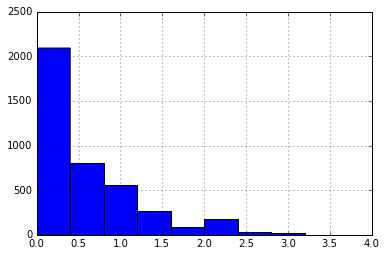

In [38]:
hrsd02.groupby('src_subject_id')['hsuic'].mean().hist()

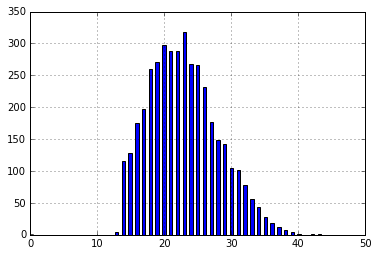

In [14]:
hrsd02.hdtot_r.hist(bins=np.linspace(0., 50., 100))

In [16]:
#let's check to make sure we know what the data structure is
type(hrsd02)

pandas.core.frame.DataFrame

In [17]:
#I could also inspect the individual cell variable types with the following code; this also reveals subarrays
#hrsd02.dtypes

In [18]:
 #Reminder: arrays can have the following attributes: np.array(hrsd02, dtype=None, copy=True, order='K', subok=False, ndmin=0)

In [19]:
hrsd02.shape

(21047, 92)

# Refining the matrix

In [ ]:
#At this point, I think what I need to do is create a tuple that contains only the datapoints I care about.
#The most obvious way to do this would be to write a comma-separated tuple of indices pointing to individual values
    #But that seems terrible. Is there any otherway to do it?

In [ ]:
#I think what we want to do is slice the subarrays in a stepwise fashion (eg pg 44 of Python Data Science Handbook)

In [ ]:
hrsd02.sub = hrsd02[]
print (hrsd02.sub)

In [46]:
hrsd_new = hrsd02.loc[:, 'hsoin':'hsex']
hrsd_drop = hrsd_new.dropna()
hrsd_drop.shape

(20942, 17)

In [52]:
hrsd02.iloc[hrsd02.index.any(hrsd02.src_subject_id==17), 13:29]

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [50]:
hrsd02.index

RangeIndex(start=0, stop=21047, step=1)

## Let's make a quick scatterplot

In [ ]:
# This code is from http://stamfordresearch.com/k-means-clustering-in-python/
# Store the inputs as a Pandas Dataframe and set the column names
x1 = pd.DataFrame(hrsd02.hpanx)
x1.columns = ['Psychic Anxiety']
 
y1 = pd.DataFrame(hrsd02.hdtot_r)
y1.columns = ['Ham-D Total Score']

x2 = pd.DataFrame(hrsd02.hmdsd)
x2.columns = ['Depressed Mood']
 
y2 = pd.DataFrame(hrsd02.hdtot_r)
y2.columns = ['Ham-D Total Score']

In [ ]:
# Set the size of the plot
plt.figure(figsize=(14,7))

# Plot
plt.subplot(1, 2, 1)
plt.scatter(x1, y1)
plt.title('Psychic Anxiety vs Total Score')
 
plt.subplot(1, 2, 2)
plt.scatter(x2, y2)
plt.title('Depressed Mood vs Total Score')

## K-means

Now I'm getting way ahead of myself! This can stay here for later.

In [ ]:
# Again, from http://stamfordresearch.com/k-means-clustering-in-python/
# K Means Cluster
model = pd.KMeans(n_clusters=4)
model.fit(x)